In [1]:
import numpy as np
import scipy as sp
import distances
import gr_kmeans
import gr_lbg
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [2]:
def generate_point_clouds(m,n, clusters = 2, cluster_size = 10, eps=.1):
    point_clouds = []
    labels = []
    for c in range(clusters):
        point_clouds.append(np.linalg.qr(np.random.random((m,n))*2-1)[0])
        labels.append(c)
        for i in range(cluster_size-1):
            point_clouds.append(np.linalg.qr(point_clouds[c*cluster_size]+eps*(np.random.random((m,n))*2-1))[0])
            labels.append(c)
    return point_clouds, labels

I started out by playing with points on Gr(1,3) so I could visualize them on a sphere in euclidean space. I generated clusters and embedded them with MDS, and also ran LBG to find centers for each.  The most interesting picture is probably the last one.

In [25]:
cluster_size = 10
clusters=3
data, labels = generate_point_clouds(3,1, clusters=clusters, cluster_size=cluster_size, eps=.1)
for i in range(len(data)):
    if data[i][2] < 0:
        data[i] = -data[i]
        
# hard code for now
color = [[1, 0, 0],[0, 1, 0], [0,0,1]]

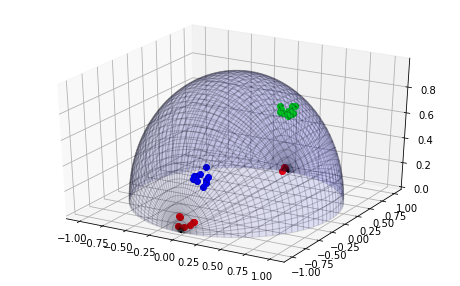

In [26]:
fig = plt.figure(figsize=(8,5))
ax = plt.axes(projection='3d')

u = np.linspace(0, np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = np.outer(np.cos(u), np.sin(v))
y = np.outer(np.sin(u), np.sin(v))
z = np.outer(np.ones(np.size(u)), np.cos(v))

# Plot the surface
ax.plot_surface(x, z, y, color='b', alpha=.1, edgecolor='k')
for i in range(clusters):
    for j in range(cluster_size):
        ax.plot3D(data[i*cluster_size + j][0], data[i*cluster_size + j][1], data[i*cluster_size + j][2], 'o', color=color[i])
        

plt.show()

Note the red cluster overlapping both sides of the hemisphere, since opposite ends of the base circle are identified with each other. I remember we talked a bit about thinking of Grassmannians as n-spheres, but that isn't quite right.  I think they all end up being n-hemispheres with that type of identification at the bisecting hyperplane, but I haven't quite wrapped my head around that for the higher dimensional cases. 

LBG terminated after 2 iterations 



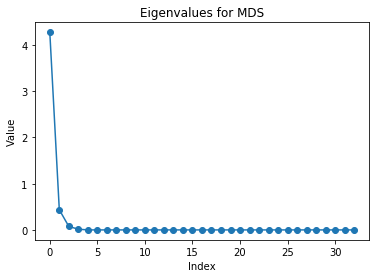

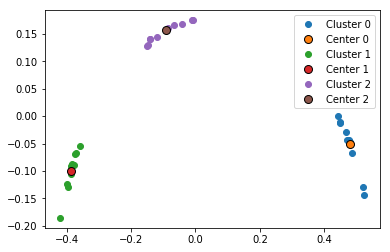

In [29]:
g = gr_lbg.gr_lbg()
g.fit(data, center_count=3, plot_results = True, eigplot=True)

Nice embeddings that don't show any of the interesting behavior.

The next part is mostly playing with different numbers of clusters and just generally testing code until the very end.

In [30]:
cluster_size = 100
clusters=4
data, labels = generate_point_clouds(3,1, clusters=clusters, cluster_size=cluster_size, eps=.1)
for i in range(len(data)):
    if data[i][2] < 0:
        data[i] = -data[i]
        
# hard code for now
color = [[1, 0, 0],[0, 1, 0], [0,0,1], [.5,.5,.5]]

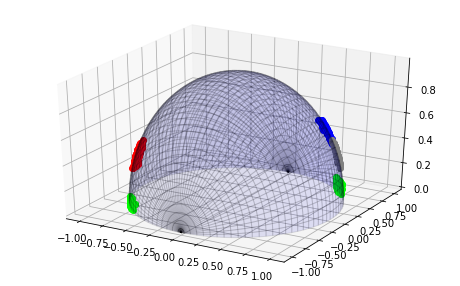

In [31]:
fig = plt.figure(figsize=(8,5))
ax = plt.axes(projection='3d')

u = np.linspace(0, np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = np.outer(np.cos(u), np.sin(v))
y = np.outer(np.sin(u), np.sin(v))
z = np.outer(np.ones(np.size(u)), np.cos(v))

# Plot the surface
ax.plot_surface(x, z, y, color='b', alpha=.1, edgecolor='k')
for i in range(clusters):
    for j in range(cluster_size):
        ax.plot3D(data[i*cluster_size + j][0], data[i*cluster_size + j][1], data[i*cluster_size + j][2], 'o', color=color[i])
        

plt.show()

LBG terminated after 8 iterations 



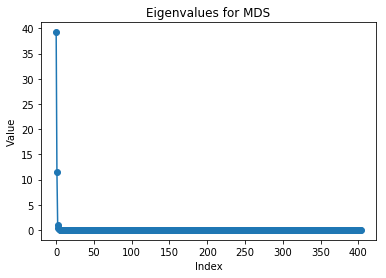

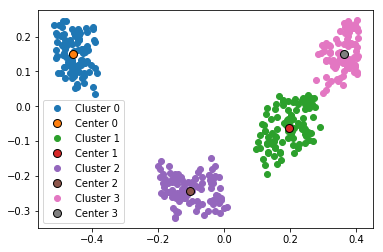

In [32]:
g = gr_lbg.gr_lbg()
g.fit(data, center_count=4, plot_results = True, eigplot=True)

In [33]:
cluster_size = 100
clusters=12
data, labels = generate_point_clouds(3,1, clusters=clusters, cluster_size=cluster_size, eps=.1)
for i in range(len(data)):
    if data[i][2] < 0:
        data[i] = -data[i]
        
# hard code for now
color = [[1, 0, 0],[0, 1, 0], [0,0,1], [.5,.5,.5]]

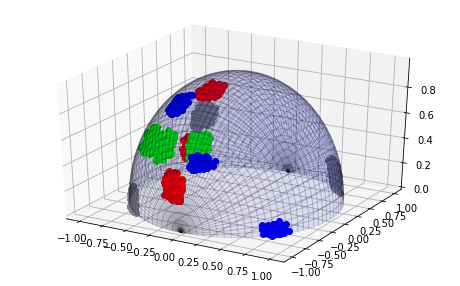

In [34]:
fig = plt.figure(figsize=(8,5))
ax = plt.axes(projection='3d')

u = np.linspace(0, np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = np.outer(np.cos(u), np.sin(v))
y = np.outer(np.sin(u), np.sin(v))
z = np.outer(np.ones(np.size(u)), np.cos(v))

# Plot the surface
ax.plot_surface(x, z, y, color='b', alpha=.1, edgecolor='k')
for i in range(clusters):
    for j in range(cluster_size):
        ax.plot3D(data[i*cluster_size + j][0], data[i*cluster_size + j][1], data[i*cluster_size + j][2], 'o', color=color[i%4])
        

plt.show()

LBG terminated after 10 iterations 



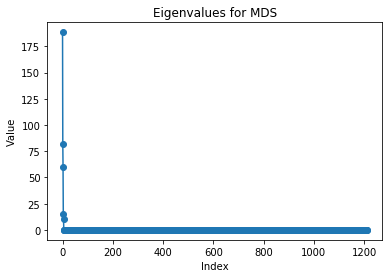

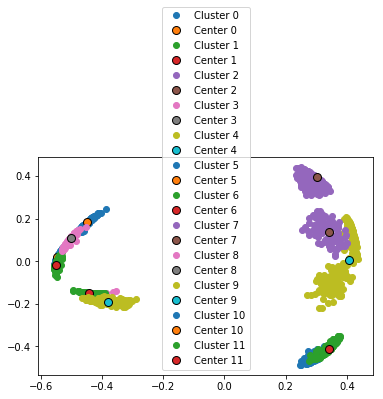

In [35]:
g = gr_lbg.gr_lbg()
g.fit(data, center_count=12, plot_results = True, eigplot=True)

I like the built in embedding method in my LBG but it definitely needs some tweaking.

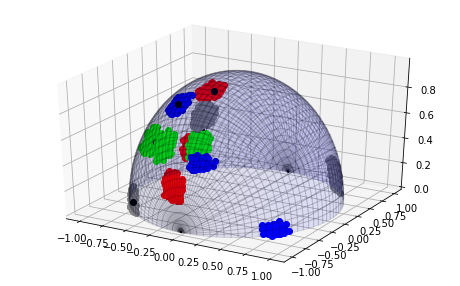

In [39]:
fig = plt.figure(figsize=(8,5))
ax = plt.axes(projection='3d')

u = np.linspace(0, np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = np.outer(np.cos(u), np.sin(v))
y = np.outer(np.sin(u), np.sin(v))
z = np.outer(np.ones(np.size(u)), np.cos(v))

# Plot the surface
ax.plot_surface(x, z, y, color='b', alpha=.1, edgecolor='k')
for i in range(clusters):
    for j in range(cluster_size):
        ax.plot3D(data[i*cluster_size + j][0], data[i*cluster_size + j][1], data[i*cluster_size + j][2], 'o', color=color[i%4])
    if g.centers[i][2]<0:
        center = -g.centers[i]
    else:
        center = g.centers[i]
    ax.plot3D(center[0],center[1],center[2],'ok', )
plt.show()

Here is the really good example:

Two clusters with $\epsilon = 0.5$.  This one gave the most insight into why we might be seeing centers embedded outside of clusters.

In [43]:
cluster_size = 100
clusters=2
data, labels = generate_point_clouds(3,1, clusters=clusters, cluster_size=cluster_size, eps=.5)
for i in range(len(data)):
    if data[i][2] < 0:
        data[i] = -data[i]
        
# hard code for now
color = [[1, 0, 0],[0, 1, 0], [0,0,1], [.5,.5,.5]]

LBG terminated after 3 iterations 



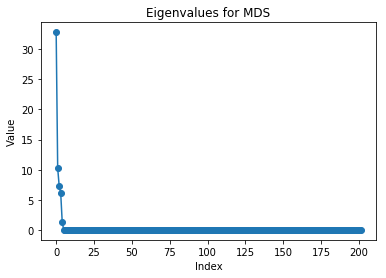

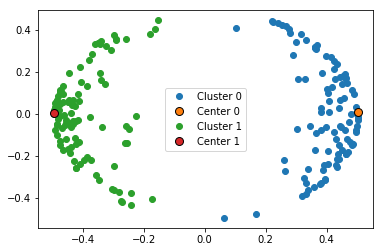

In [44]:
g = gr_lbg.gr_lbg()
g.fit(data, center_count=2, plot_results = True, eigplot=True)

LBG centers and MDS embedding above, data graphed on 3D hemisphere below, with LBG centers in black. The 3D picture clearly shows the centers are truly the center of each cluster, but the MDS embedding puts them on the outer edges of the cluster.  Thinking about how the hemisphere is projected, this makes sense, especially considering green and red points near the xy plane in the picture are actually very close to each other. Because of how points on that plane are identified, it makes sense that the two centers are farther from each other than any other point.

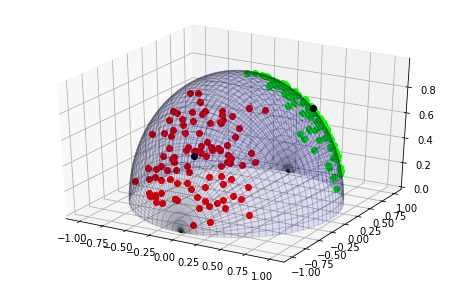

In [45]:
fig = plt.figure(figsize=(8,5))
ax = plt.axes(projection='3d')

u = np.linspace(0, np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = np.outer(np.cos(u), np.sin(v))
y = np.outer(np.sin(u), np.sin(v))
z = np.outer(np.ones(np.size(u)), np.cos(v))

# Plot the surface
ax.plot_surface(x, z, y, color='b', alpha=.1, edgecolor='k')
for i in range(clusters):
    for j in range(cluster_size):
        ax.plot3D(data[i*cluster_size + j][0], data[i*cluster_size + j][1], data[i*cluster_size + j][2], 'o', color=color[i%4])
    if g.centers[i][2]<0:
        center = -g.centers[i]
    else:
        center = g.centers[i]
    ax.plot3D(center[0],center[1],center[2],'ok', )
plt.show()

This was what convinced me I was on the right track, the next notebook has more experiments on higher dimensional manifolds.